In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv('advertising.csv')

In [3]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [5]:
# Display dataset information
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [6]:
#Exploratory Data Analysis (EDA)

# Statistical summary of the dataset
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


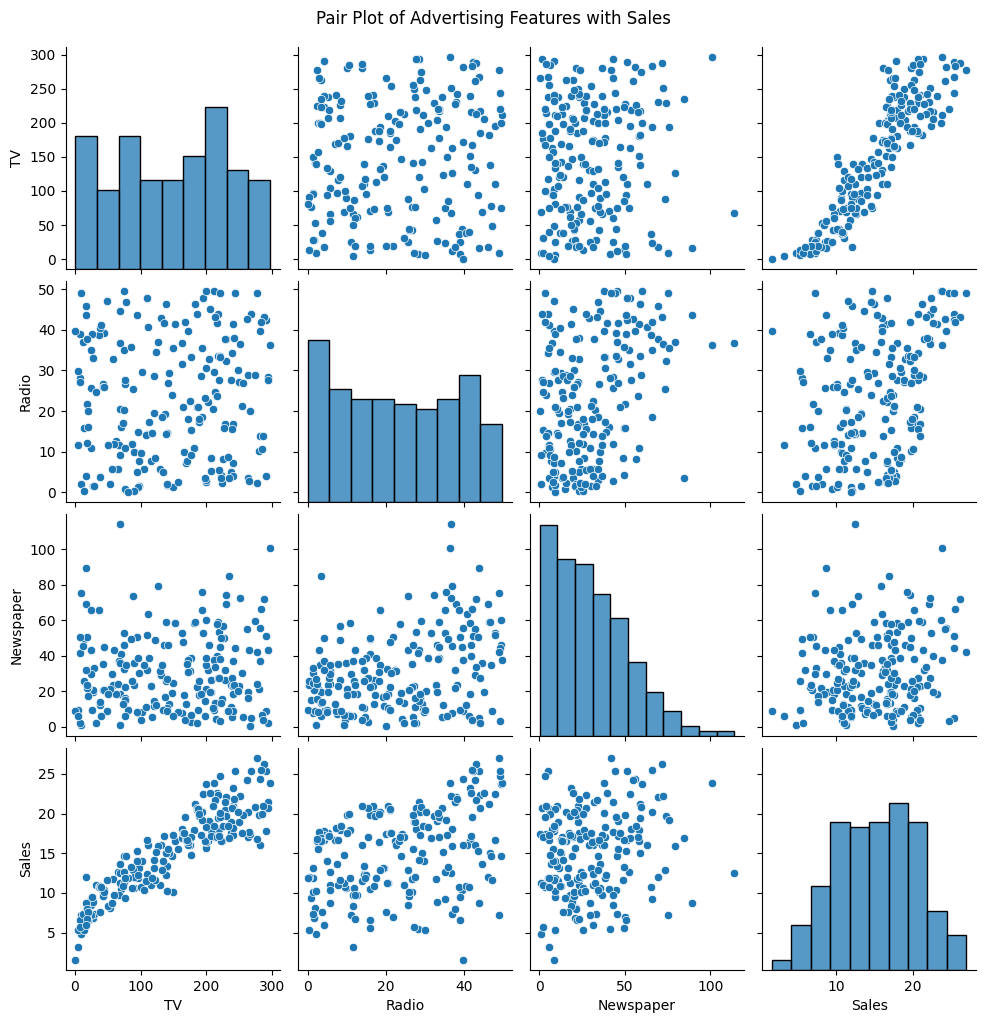

In [7]:
# Pair plot to visualize relationships between features and sales
sns.pairplot(data)
plt.suptitle("Pair Plot of Advertising Features with Sales", y=1.02)
plt.show()

In [8]:
# Correlation matrix and heatmap to understand feature correlations
correlation_matrix = data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


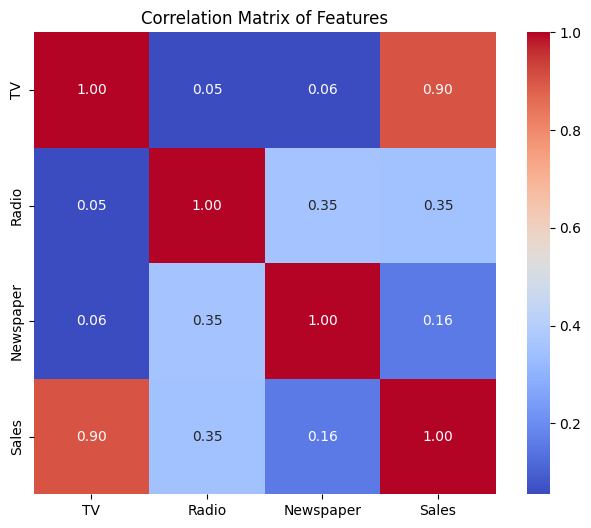

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

In [10]:
#Data Preprocessing
# Splitting the dataset into features (X) and target (y)
X = data.drop(columns=['Sales'])
y = data['Sales']

In [11]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 3. Model Training and Evaluation
# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [15]:
print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Model Performance Metrics:
Mean Squared Error (MSE): 2.9077569102710896
Root Mean Squared Error (RMSE): 1.7052146229349223
R-squared (R2): 0.9059011844150826


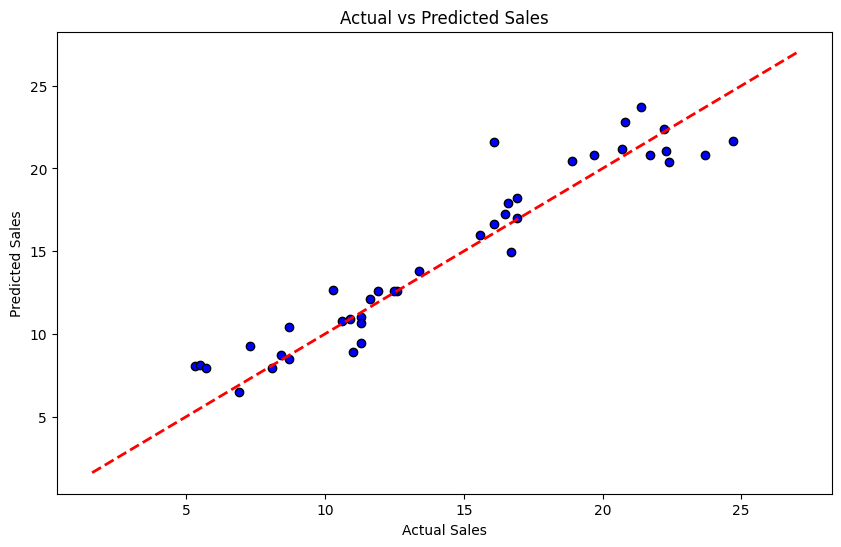

In [16]:
#Visualizing Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [17]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

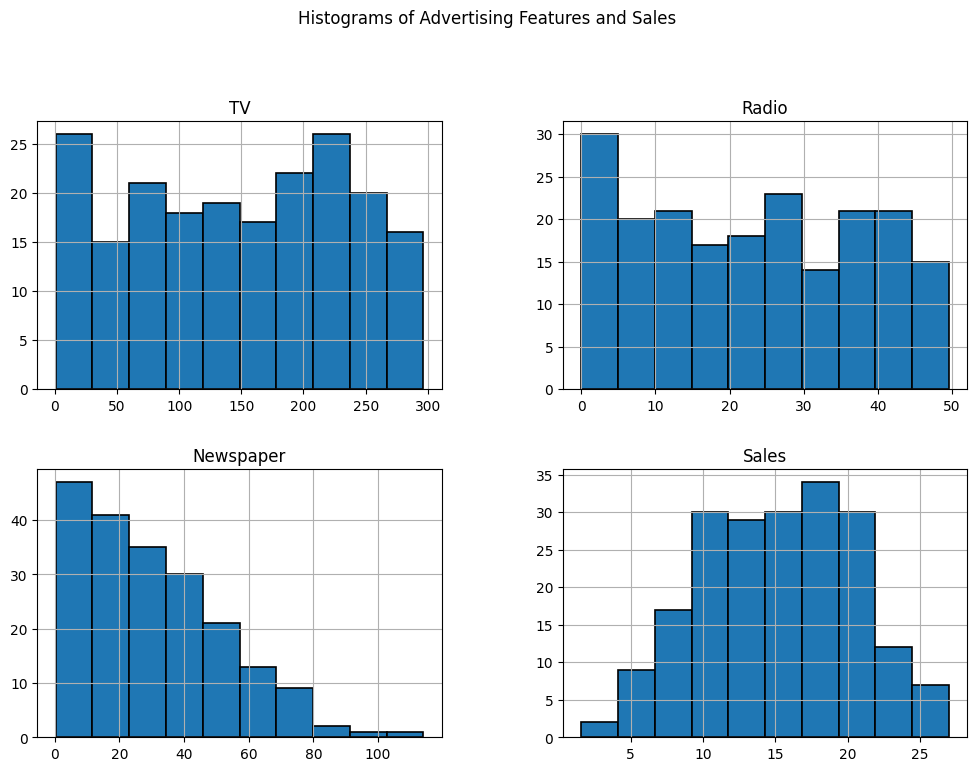

In [18]:
#Feature Distribution Analysis

# Histograms of each feature
data.hist(bins=10, edgecolor="black", linewidth=1.2, figsize=(12, 8))
plt.suptitle("Histograms of Advertising Features and Sales", y=1.02)
plt.show()

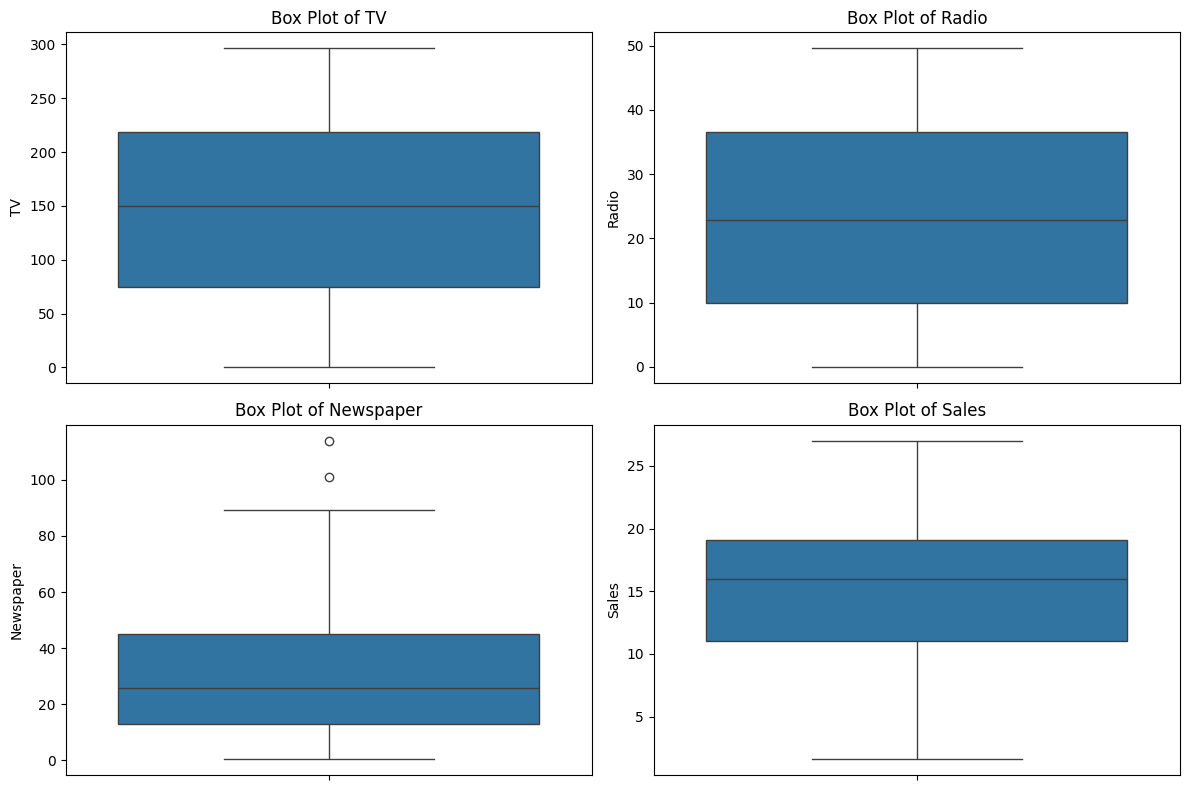

In [19]:
# Box plots to check for outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[column])
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()

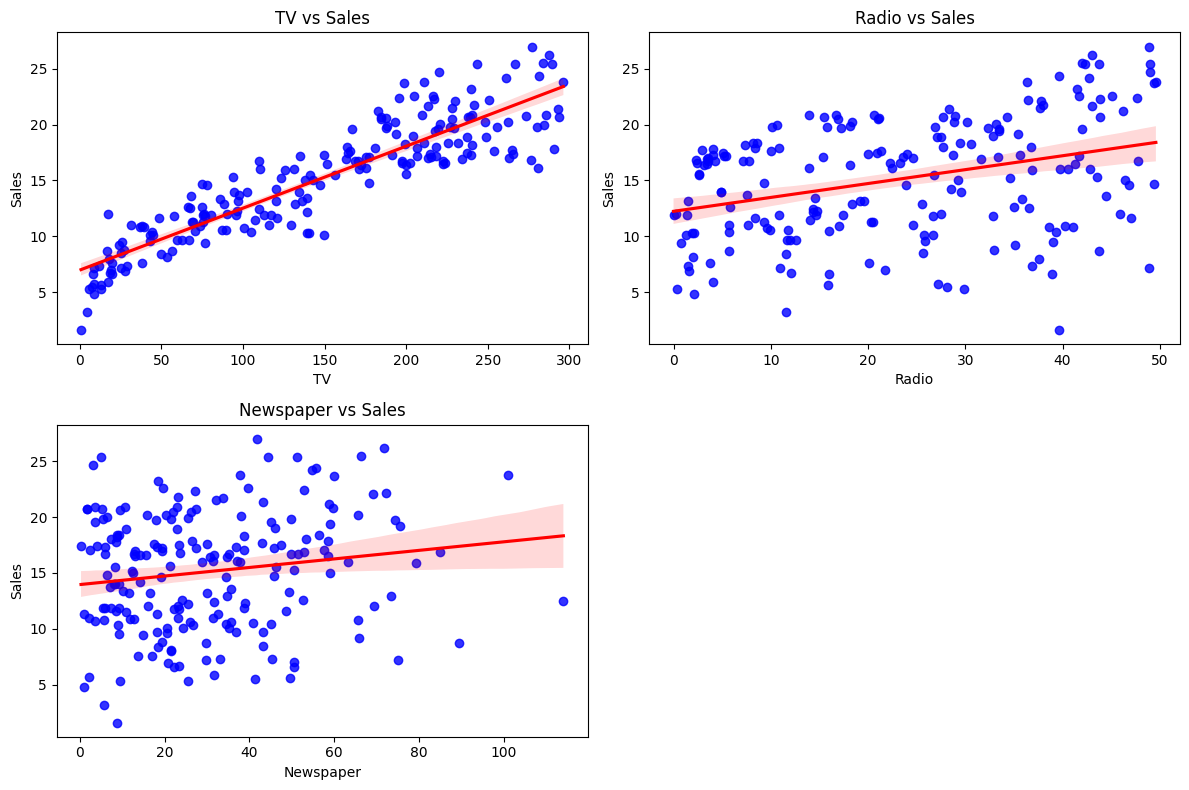

In [20]:
#Relationship Analysis with Sales

# Scatter plots with regression lines
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1], 1):  # Exclude 'Sales' column
    plt.subplot(2, 2, i)
    sns.regplot(x=column, y='Sales', data=data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
    plt.title(f"{column} vs Sales")
plt.tight_layout()
plt.show()

In [ ]:
# 3. Feature Importance using Random Forest

# Train a Random Forest Regressor to assess feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)